In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

In [ ]:
data_stops = pd.read_csv('../data/uni_molde_v3.csv', sep=';', low_memory=False)

sorted_data_stops = data_stops.sort_values(by='stop_dispatched_at', ascending=True)
sorted_data_stops = sorted_data_stops.reset_index(drop=True)
sorted_data_stops.head()

In [ ]:
import geopandas as gpd

gdf_rs = gpd.GeoDataFrame(
    sorted_data_stops,
    geometry=gpd.points_from_xy(
        x = sorted_data_stops['current_lat'],
        y = sorted_data_stops['current_lng']
    )
)
gdf_rs.head()

In [ ]:
gdf_rs.plot()

In [ ]:
gdf_rs.crs = {'init': 'epsg:5799'}
gdf_rs.crs

/Users/anko/opt/anaconda3/envs/RealDataClassificator/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

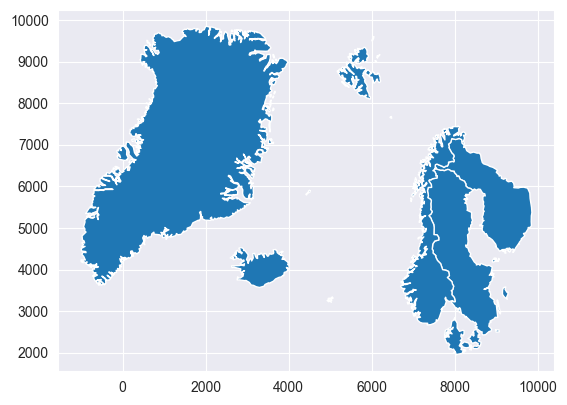

In [26]:
# Create geodataframe
gdf_map = gpd.read_file(
    'https://code.highcharts.com/mapdata/custom/nordic-countries.geo.json'
)

# Set the CRS
gdf_map.crs = {'init': 'epsg:5799'}

# Check the CRS
gdf_map.plot()



In [27]:
gdf_map.head()

,id,hc-group,hc-middle-x,hc-middle-y,hc-key,hc-a2,name,labelrank,country-abbrev,subregion,region-wb,iso-a3,iso-a2,woe-id,continent,geometry
0,DK,admin0,0.18,0.58,dk,DK,Denmark,4,Den.,Northern Europe,Europe & Central Asia,DNK,DK,23424796,Europe,"MULTIPOLYGON (((8458 2163, 8532 2153, 8545 218..."
1,FO,admin0,0.40,0.72,fo,FO,Faroe Islands,6,Faeroe Is.,Northern Europe,Europe & Central Asia,FRO,FO,23424816,Europe,"MULTIPOLYGON (((4960 3257, 4962 3225, 4922 325..."
2,GL,admin0,0.56,0.41,gl,GL,Greenland,3,Grlnd.,Northern America,Europe & Central Asia,GRL,GL,23424828,North America,"MULTIPOLYGON (((-75 6281, -196 6332, -178 6382..."
3,FI,admin0,0.74,0.60,fi,FI,Finland,3,Fin.,Northern Europe,Europe & Central Asia,FIN,FI,23424812,Europe,"MULTIPOLYGON (((9297 4417, 9295 4457, 9269 445..."
4,SE,admin0,0.46,0.66,se,SE,Sweden,3,Swe.,Northern Europe,Europe & Central Asia,SWE,SE,23424954,Europe,"MULTIPOLYGON (((8127 3008, 8113 2965, 8071 301..."


In [28]:
# gdf_map = gdf_map['iso-a2']
gdf_map = gdf_map.to_crs(epsg='5596')

# Check the CRS
gdf_map.crs

<Projected CRS: EPSG:5596>
Name: FEH2010 / Fehmarnbelt TM
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Fehmarnbelt area of Denmark and Germany.
- bounds: (10.66, 54.33, 12.01, 54.83)
Coordinate Operation:
- name: Fehmarnbelt TM
- method: Transverse Mercator
Datum: Fehmarnbelt Datum 2010
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
def plot_map_1():
    """Plot a map and data"""

    # Base Map
    base_map = gdf_map.plot(
        color='white',
        edgecolor='grey',
        linewidth=0.5,
        figsize=(15, 8),
        legend=True
    )
    base_map.axis('off')
    base_map.set_title('Location')

    # Data
    gdf_rs.plot(ax=base_map);

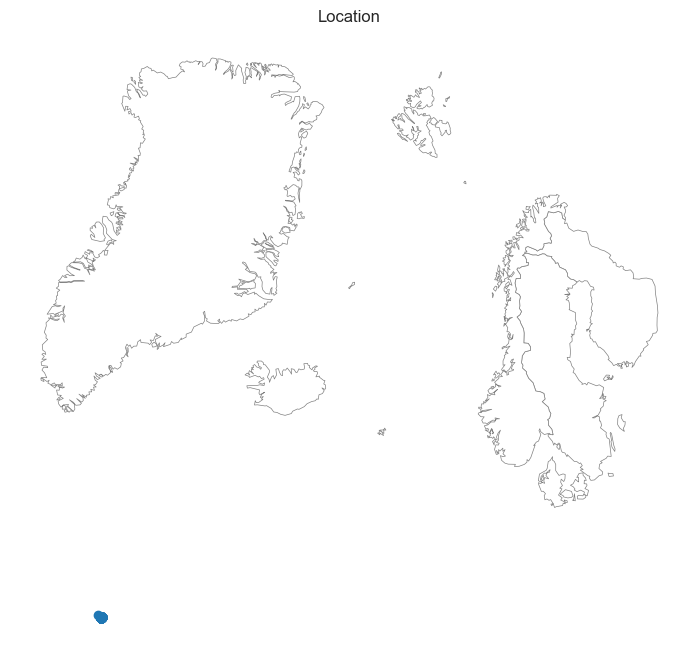

In [22]:
plot_map_1()

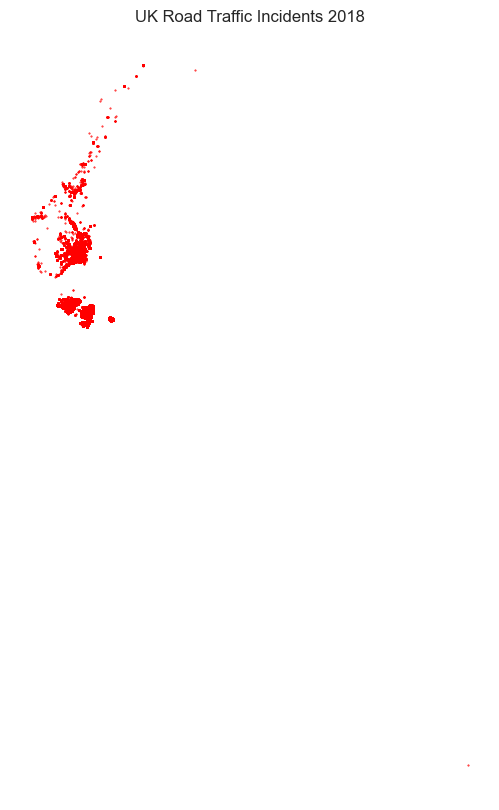

In [29]:
def plot_map_2():
    # Base Map
    base_map = gdf_map.to_crs(epsg='5596').plot(
        color='white',
        edgecolor='grey',
        linewidth=0.5,
        figsize=(10, 10),
        legend=True
    )

    base_map.axis('off')
    base_map.set_title('Locations')

    # Data
    gdf_rs.to_crs(epsg='3395').plot(
        ax=base_map,
        markersize=0.2,
        color='red'
    );

plot_map_2()

In [36]:
from keplergl import KeplerGl

kepler_map = KeplerGl(
    height=700,
    data={
        'Locations': gdf_rs,
        'Depots': gdf_depots
    }
)

kepler_map.save_to_html(file_name="Location.html")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/anko/opt/anaconda3/envs/RealDataClassificator/lib/python3.10/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Map saved to Location.html!
